In this Notebook we show cases where the Standard method fails to estimate the tails of two polynomial distributions, whereas our method suceeds. In this case the sampling from different individual conditional distribution is non uniform. About 30 percent of the samples come from the fatter tail while the rest comes from the thinner tail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def pickands_estimator(x,thresh,avg_size):
    y=x.copy()
    length=x.shape[0]
    cutoff=int(thresh*length)
    x=-np.sort(-np.sort(x, axis=0)[cutoff:], axis=0)
    ksi=np.array([])
    for j in np.arange(np.sqrt(length-cutoff))[-avg_size:]:
        k=int(j+1)
        ksi=np.append(ksi,np.log((x[k]-x[2*k])/(x[2*k]-x[4*k]))/np.log(2))
       
    ksi=ksi.reshape(avg_size,-1)
    ksi=ksi.mean(0)
    return ksi

In [3]:
#Define two distributions, with tail shape parameters 1 and 0.5. We sample 1000 and 4000 points from these 
#distributions respectively, put them together in an array which represents the samples from the non-uniform mixture of 
#these two distribution, Apply Pickands estimator, to this array in order to estimate the tail shape parameter.
#Repeat this process 1000 times to model the distribution of the predictions of the shape parameter of the marginal
hist_few_samples=[]
for i in range(1000):
    x1=np.random.rand(1000)
    y1=x1**(-1)
    x2=np.random.rand(4000)
    y2=x2**(-0.5)
    z=np.hstack((y1,y2+1000))
    hist_few_samples.append(pickands_estimator(z,0.95,5)[0])
hist_few_samples=np.array(hist_few_samples)

In [4]:
np.array(hist_few_samples).mean()

0.5048631793735736

In [5]:
#Define two distributions, with tail shape parameters 1 and 0.5. We sample 10^7 and 4*10^7 points from these 
#distributions repsectively, put them together in an array which represents the samples from the non-uniform mixture of 
#these two distribution, Apply Pickands estimator, to this array in order to estimate the tail shape parameter.
#Repeat this process 1000 times to model the distribution of the predictions of the shape parameter of the marginal
hist_many_samples=[]
for i in range(1000):
    if i%1==0:
        print(i)
    x1=np.random.rand(10000000)
    y1=x1**(-1)
    x2=np.random.rand(40000000)
    y2=x2**(-0.5)
    z=np.hstack((y1,y2+1000))
    hist_many_samples.append(pickands_estimator(z,0.95,5)[0])
hist_many_samples=np.array(hist_many_samples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
np.array(hist_many_samples).mean()

1.0144320397056519

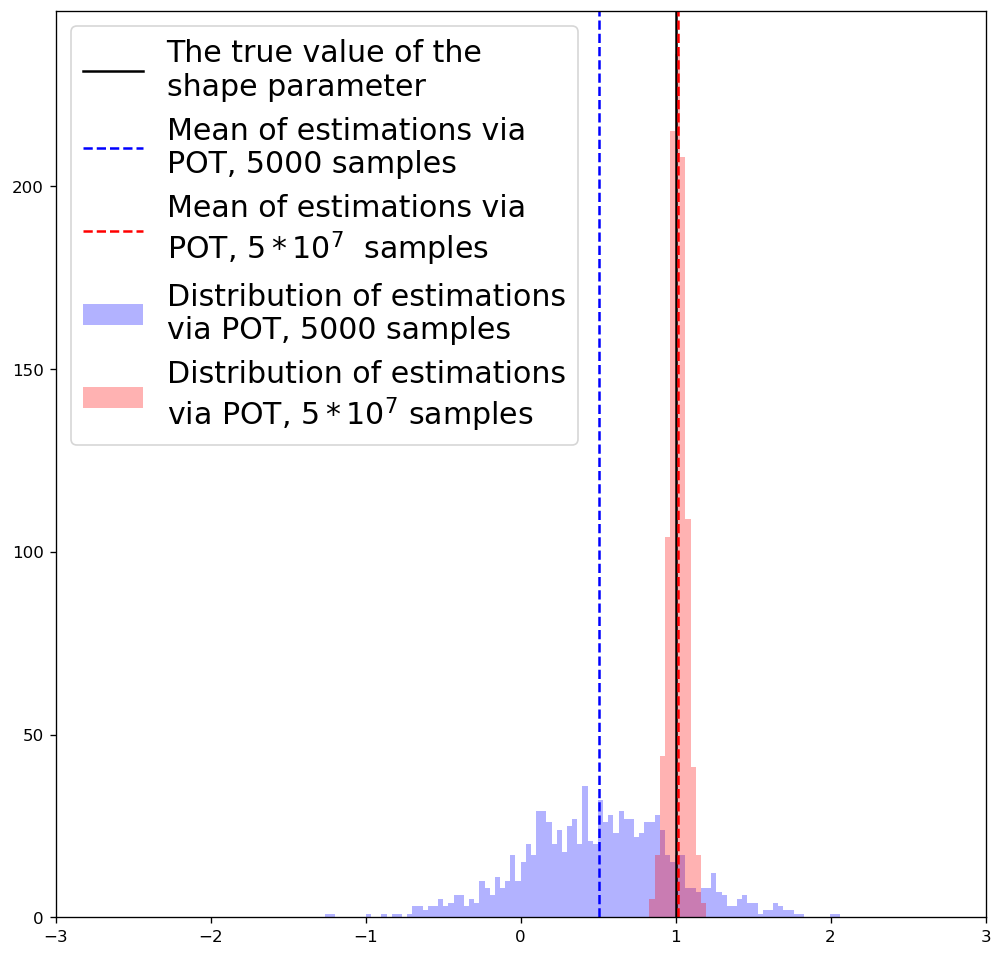

In [7]:
#Visualize results
figure(figsize=(10, 10), dpi=120)
bins=np.histogram(np.hstack((hist_few_samples,hist_many_samples)), bins=100)[1]
plt.hist(hist_few_samples, bins=bins, alpha=0.3, color='blue',label='Distribution of estimations\nvia POT, 5000 samples')
plt.hist(hist_many_samples, bins=bins, alpha=0.3, color='red', label='Distribution of estimations\nvia POT, $5*10^7$ samples')
plt.xlim([-3,3])
plt.axvline(1, color='black', alpha=1,label='The true value of the\nshape parameter')
plt.axvline(hist_few_samples.mean(), color='blue', alpha=1,linestyle='--',label='Mean of estimations via\nPOT, 5000 samples')
plt.axvline(hist_many_samples.mean(), color='red', alpha=1,linestyle='--',label='Mean of estimations via\nPOT, $5*10^7$  samples')
plt.legend( loc = 'upper left', prop={"size":18})
#plt.savefig('necessity_of_our_theorem_eg2_standard_approach_nonuniform.jpg')

In [10]:
#Define two distributions, with tail shape parameters 1 and 0.5.  We sample 1000 and 4000 points from these 
#two distributions, and estimate the shape parameter of the tails of each separately. We choose the maximum of
#the estimated values. 
hist_few_samples=[]
for i in range(1000):
    x1=np.random.rand(1000)
    y1=x1**(-1)
    x2=np.random.rand(4000)
    y2=x2**(-0.5)
    xi1=pickands_estimator(y1,0.95,5)[0]
    xi2=pickands_estimator(y2,0.95,5)[0]
    hist_few_samples.append(max(xi1,xi2))
hist_few_samples=np.array(hist_few_samples)

In [11]:
np.array(hist_few_samples).mean()

0.9847467244234206

In [12]:
#Define two distributions, with tail shape parameters 1 and 0.5. We sample 10^7 and 4^10^7 points from these 
#two distributions, and estimate the shape parameter of the tails of each separately. We choose the maximum of
#the estimated values. 
hist_many_samples=[]
for i in range(1000):
    if i%1==0:
        print(i)
    x1=np.random.rand(10000000)
    y1=x1**(-1)
    x2=np.random.rand(40000000)
    y2=x2**(-0.5)
    xi1=pickands_estimator(y1,0.95,5)[0]
    xi2=pickands_estimator(y2,0.95,5)[0]
    hist_many_samples.append(max(xi1,xi2))
hist_many_samples=np.array(hist_many_samples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
np.array(hist_many_samples).mean()

0.9985034152437476

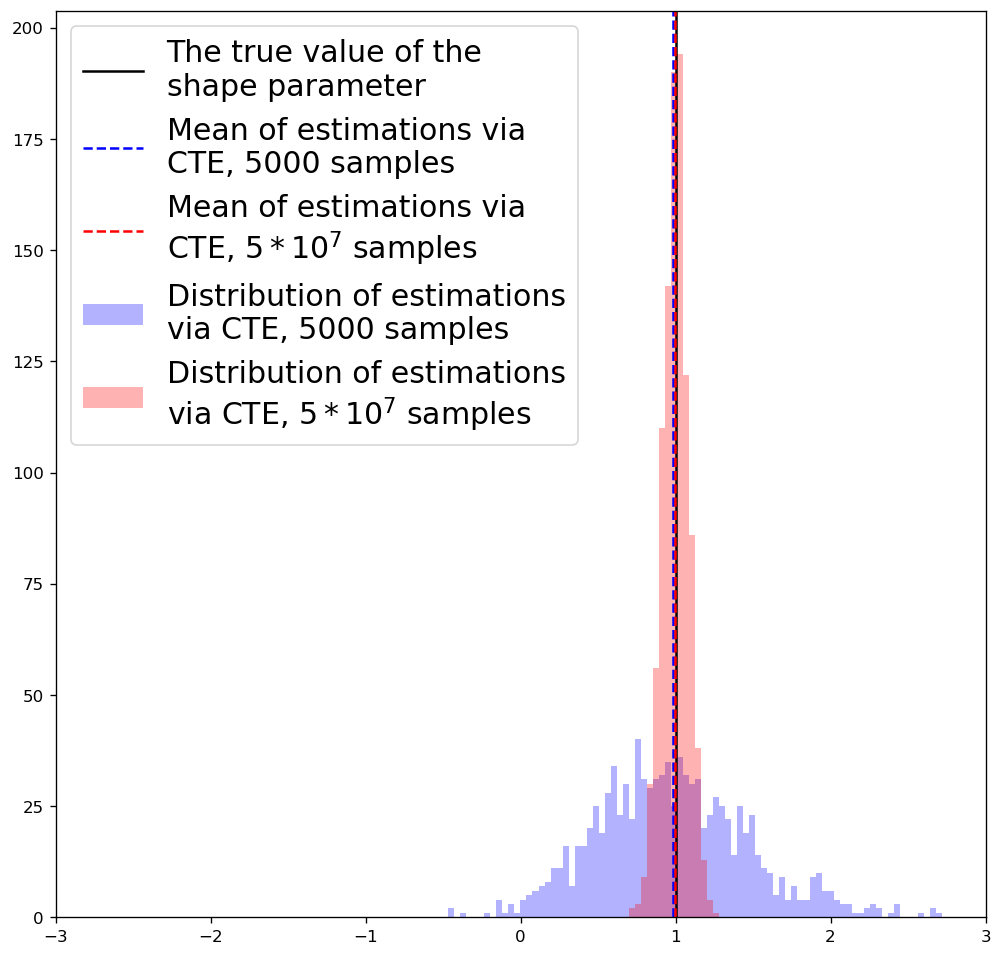

In [14]:
#Visualize results

figure(figsize=(10, 10), dpi=120)
bins=np.histogram(np.hstack((hist_few_samples,hist_many_samples)), bins=100)[1]
plt.hist(hist_few_samples, bins=bins, alpha=0.3, color='blue',label='Distribution of estimations\nvia CTE, 5000 samples')
plt.hist(hist_many_samples, bins=bins, alpha=0.3, color='red', label='Distribution of estimations\nvia CTE, $5*10^7$ samples')
plt.xlim([-3,3])
plt.axvline(1, color='black', alpha=1,label='The true value of the\nshape parameter')
plt.axvline(hist_few_samples.mean(), color='blue', alpha=1,linestyle='--',label='Mean of estimations via\nCTE, 5000 samples')
plt.axvline(hist_many_samples.mean(), color='red', alpha=1,linestyle='--', label='Mean of estimations via\nCTE, $5*10^7$ samples')
plt.legend( loc = 'upper left', prop={"size":18})
#plt.savefig('necessity_of_our_theorem_eg2_our_approach_nonuniform.jpg')